<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/cnnprac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-02-19 13:15:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.250.4.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.2MB/s    in 5.9s    

2024-02-19 13:15:44 (17.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref=zipfile.ZipFile('pizza_steak.zip')

In [ ]:
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 384, 3)


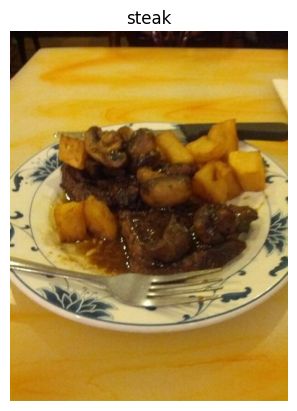

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[ 20,   7,   1],
        [ 17,   4,   0],
        [ 14,   3,   0],
        ...,
        [ 20,  10,  18],
        [ 19,   9,  17],
        [ 19,   9,  17]],

       [[ 20,   7,   1],
        [ 15,   4,   0],
        [ 13,   2,   0],
        ...,
        [ 20,  10,  18],
        [ 21,  11,  19],
        [ 21,  11,  19]],

       [[ 19,   8,   2],
        [ 15,   4,   0],
        [ 12,   3,   0],
        ...,
        [ 17,  10,  17],
        [ 18,  11,  18],
        [ 19,  12,  19]],

       ...,

       [[187, 132,   6],
        [190, 135,   9],
        [191, 135,  12],
        ...,
        [198, 142,   7],
        [199, 143,   8],
        [198, 142,   7]],

       [[190, 135,   9],
        [193, 138,  12],
        [195, 139,  16],
        ...,
        [199, 143,   8],
        [199, 143,   8],
        [197, 141,   6]],

       [[193, 138,  12],
        [197, 142,  16],
        [199, 143,  22],
        ...,
        [205, 149,  14],
        [204, 148,  13],
        [201, 145,  10]]], dtype=uint8)
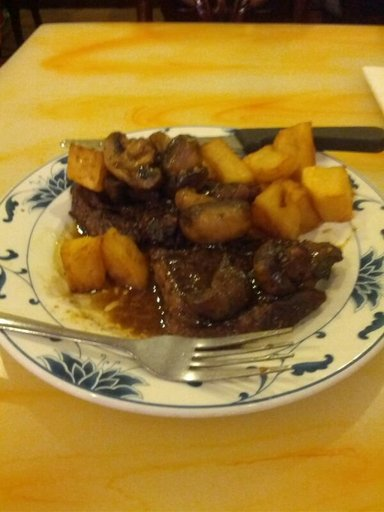

In [ ]:
# View the img (actually just a big array/tensor)
img

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 384, 3)

In [ ]:
img/255

array([[[0.07843137, 0.02745098, 0.00392157],
        [0.06666667, 0.01568627, 0.        ],
        [0.05490196, 0.01176471, 0.        ],
        ...,
        [0.07843137, 0.03921569, 0.07058824],
        [0.0745098 , 0.03529412, 0.06666667],
        [0.0745098 , 0.03529412, 0.06666667]],

       [[0.07843137, 0.02745098, 0.00392157],
        [0.05882353, 0.01568627, 0.        ],
        [0.05098039, 0.00784314, 0.        ],
        ...,
        [0.07843137, 0.03921569, 0.07058824],
        [0.08235294, 0.04313725, 0.0745098 ],
        [0.08235294, 0.04313725, 0.0745098 ]],

       [[0.0745098 , 0.03137255, 0.00784314],
        [0.05882353, 0.01568627, 0.        ],
        [0.04705882, 0.01176471, 0.        ],
        ...,
        [0.06666667, 0.03921569, 0.06666667],
        [0.07058824, 0.04313725, 0.07058824],
        [0.0745098 , 0.04705882, 0.0745098 ]],

       ...,

       [[0.73333333, 0.51764706, 0.02352941],
        [0.74509804, 0.52941176, 0.03529412],
        [0.74901961, 0

In [ ]:
import tensorflow as tf
tf_img=tf.constant(img)

In [ ]:
tf_img

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 20,   7,   1],
        [ 17,   4,   0],
        [ 14,   3,   0],
        ...,
        [ 20,  10,  18],
        [ 19,   9,  17],
        [ 19,   9,  17]],

       [[ 20,   7,   1],
        [ 15,   4,   0],
        [ 13,   2,   0],
        ...,
        [ 20,  10,  18],
        [ 21,  11,  19],
        [ 21,  11,  19]],

       [[ 19,   8,   2],
        [ 15,   4,   0],
        [ 12,   3,   0],
        ...,
        [ 17,  10,  17],
        [ 18,  11,  18],
        [ 19,  12,  19]],

       ...,

       [[187, 132,   6],
        [190, 135,   9],
        [191, 135,  12],
        ...,
        [198, 142,   7],
        [199, 143,   8],
        [198, 142,   7]],

       [[190, 135,   9],
        [193, 138,  12],
        [195, 139,  16],
        ...,
        [199, 143,   8],
        [199, 143,   8],
        [197, 141,   6]],

       [[193, 138,  12],
        [197, 142,  16],
        [199, 143,  22],
        ...,
        [205, 149,  1

In [ ]:
tf_img_norm=tf_img/255

In [ ]:
tf_img_norm

<tf.Tensor: shape=(512, 384, 3), dtype=float32, numpy=
array([[[0.07843138, 0.02745098, 0.00392157],
        [0.06666667, 0.01568628, 0.        ],
        [0.05490196, 0.01176471, 0.        ],
        ...,
        [0.07843138, 0.03921569, 0.07058824],
        [0.07450981, 0.03529412, 0.06666667],
        [0.07450981, 0.03529412, 0.06666667]],

       [[0.07843138, 0.02745098, 0.00392157],
        [0.05882353, 0.01568628, 0.        ],
        [0.05098039, 0.00784314, 0.        ],
        ...,
        [0.07843138, 0.03921569, 0.07058824],
        [0.08235294, 0.04313726, 0.07450981],
        [0.08235294, 0.04313726, 0.07450981]],

       [[0.07450981, 0.03137255, 0.00784314],
        [0.05882353, 0.01568628, 0.        ],
        [0.04705882, 0.01176471, 0.        ],
        ...,
        [0.06666667, 0.03921569, 0.06666667],
        [0.07058824, 0.04313726, 0.07058824],
        [0.07450981, 0.04705882, 0.07450981]],

       ...,

       [[0.73333335, 0.5176471 , 0.02352941],
        [0.74

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Normalizing the data
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
#crating the paths for datasets
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

In [ ]:
#converting the data into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)
valid_data=valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42
)

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,  # Corrected argument name
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),  # Corrected spelling of 'layers' and 'pool_size'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),  # Corrected spelling of 'layers' and 'pool_size'
    tf.keras.layers.Flatten(),  # Flatten layer added
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history1=model1.fit(train_data,epochs=5,verbose=0,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model1.evaluate(valid_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.3263 - accuracy: 0.8560


[0.32629847526550293, 0.8560000061988831]

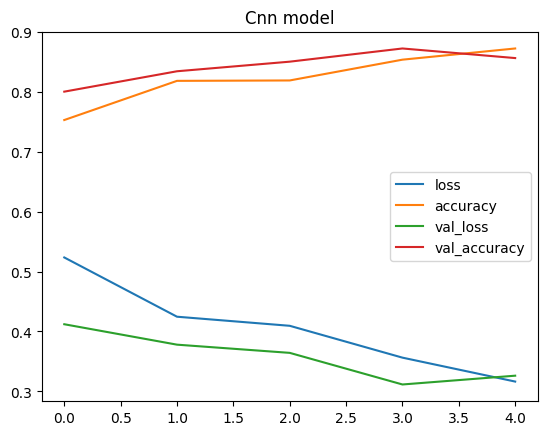

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
history1_pd=pd.DataFrame(history1.history)
history1_pd.plot()
plt.title('Cnn model')
plt.show()


Image shape: (384, 512, 3)
Image shape: (512, 382, 3)


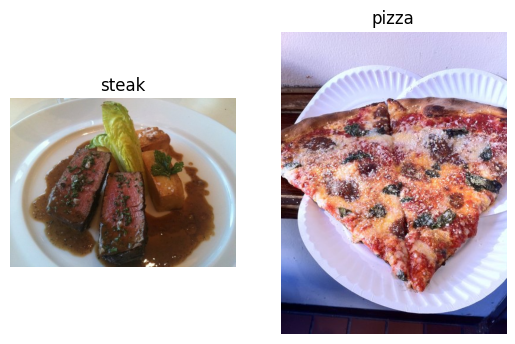

In [ ]:
#ploting random images
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image('/content/pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img=view_random_image('/content/pizza_steak/train/','pizza')

# Preprocessing the data

In [27]:
# Giving the dataset directories
train_data='/content/pizza_steak/train'
test_data='/content/pizza_steak/test'

Turning the data to batches

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

In [46]:
train_data = train_datagen.flow_from_directory('/content/pizza_steak/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory('/content/pizza_steak/test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [49]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [50]:
len(train_data)

47

In [ ]:
# Create a Cnn model

In [59]:
model3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])


model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history3=model3.fit(train_data,epochs=5,verbose=0,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))